In [47]:
from torchvision import datasets , models
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model 
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis

## Description Of The Vvariables :
- PassengerId : unique identifier
- Survived : <br>
   0 = No  1 = Yes
- Pclass : Ticket class <br>
1 = 1st , Upper
2 = 2nd , Middle 
3 = 3rd , Lower
- Name : full name with a title
- Sex : gender
- Age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- Sibsp: Number of siblings / spouses aboard the Titanic.
- Parch: Number of parents / children aboard the Titanic. 
- Ticket: Ticket number.
- Fare: Passenger fare.
- Cabin: Cabin number.
- Embarked: Port of Embarkation: <br>
  C = Cherbourg <br>
  Q = Queenstown <br>
  S = Southampton <br>
  

In [4]:
# loading data
data_dir = 'Datasets'
train_dir = data_dir + 'train/train.csv'
test_dir = data_dir + 'test/test.csv'
trainloader = torch.utils.data.DataLoader( train_dir , batch_size = 64 , shuffle = True )
testloader = torch.utils.data.DataLoader( test_dir , batch_size = 64 )

In [5]:
train_set = pd.read_csv('Datasets/train/train.csv')
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_set = pd.read_csv('Datasets/test/test.csv')
test_set.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age and Fare are countinous numeric values .<br>
Pclass and Survived are integer but categorical variable .<br>


In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# check data for NA values
train_set_NA = train_set.isna().sum()
test_set_NA = test_set.isna().sum()
print('TRAINING DATASET : \n', train_set_NA)
print('TESTING DATASET : \n', test_set_NA)

TRAINING DATASET : 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
TESTING DATASET : 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# find the mode to impute null values
train_set['Age'].mode(dropna=True)

0    24.0
dtype: float64

In [12]:
# find the mode to impute null values 
train_set['Cabin'].mode(dropna=True)

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [13]:
# find the mode to impute null values 
train_set['Embarked'].mode(dropna=True)

0    S
dtype: object

In [14]:
# find the mode to impute null values 
test_set['Age'].mode(dropna=True)

0    21.0
1    24.0
dtype: float64

In [15]:
# find the mode to impute null values 
test_set['Cabin'].mode(dropna=True)

0    B57 B59 B63 B66
dtype: object

In [16]:
# find the mode to impute null values 
test_set['Fare'].mode(dropna=True)

0    7.75
dtype: float64

### Dealing with NaN values 
- Age : 177 NaN values <br>
      the mode is 24 
      the mean 29 
      values used to replace NaN (24,29) 
- Cabin : 687 NaN values <br>
        the mode is used to replace NaN values  
        (B96,B98,C23,C25,C27) 
- Embarked : 2 NaN values  <br>
           the mode is (S) which used to replace NaN values 


### For test data 
- Age : 86 NaN values <br>
      the mode is (21 , 24) 
- Cabin : 327 NaN values <br>
      the mode is (B57,B59,B63,B66)
- Fare : 1 NaN value <br>
      the mode is (7.75)

In [17]:
# TRAINING DATASET
mode_values_training_dataset = {'Age':[24,29] , 'Cabin':['B96','B98','C23','C25','C27'], 'Embarked':['S']}

# TESTING DATASET 
mode_values_testing_dataset = {'Age':[21,24] , 'Cabin':['B57','B59','B63','B66'], 'Fare':[7.75] }

In [18]:
train_set['Age'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Age'],size=len(train_set.index))),inplace=True)


In [19]:
train_set['Cabin'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Cabin'],size=len(train_set.index))),inplace=True)

In [20]:
train_set['Embarked'].fillna(pd.Series(np.random.choice(mode_values_training_dataset['Embarked'],size=len(train_set.index))),inplace=True)

In [21]:
test_set['Age'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Age'],size=len(test_set.index))),inplace=True)
test_set['Cabin'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Cabin'],size=len(test_set.index))),inplace=True)

In [22]:
test_set['Fare'].fillna(pd.Series(np.random.choice(mode_values_testing_dataset['Fare'],size=len(test_set.index))),inplace=True)

### Creating Feature Engineering  
Features created here are mentioned in kaggle notebook : [Step 3: Prepare Data For Consumption](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy#Step-3:-Prepare-Data-for-Consumption)

In [23]:
train_set_cpy = train_set.copy(deep=True)

In [24]:
datasets = [train_set_cpy , test_set]

for dataset in datasets :
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize']>1] = 0 
    
train_set_cpy.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------  

/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:

#code categorical data
label = preprocessing.LabelEncoder()
for dataset in datasets :
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])

# the y variable aka target 
Target = ['Survived']
# define x variables for feature selection
# for charts
train_set_x = ['Pclass','Sex','Age','SibSp','Parch','Embarked','FamilySize','IsAlone']
# for algorithms calculations  
train_set_calc = ['Pclass','Sex_Code','Age','SibSp','Parch','Embarked_Code','FamilySize','IsAlone'] 

train_set_xy = Target + train_set_x
print('Original X Y: ', train_set_x, '\n')

#define x and y variables for dummy features original
train_set_dummy = pd.get_dummies(train_set_cpy[train_set_x])
train_set_x_dummy = train_set_dummy.columns.tolist()
train_set_xy_dummy = Target + train_set_x_dummy
print('Dummy X Y :',train_set_xy_dummy,'\n')

train_set_dummy.head()

Original X Y:  ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'FamilySize', 'IsAlone'] 

Dummy X Y : ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'] 



,Pclass,Age,SibSp,Parch,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,2,0,0,1,0,0,1
1,1,38.0,1,0,2,0,1,0,1,0,0
2,3,26.0,0,0,1,1,1,0,0,0,1
3,1,35.0,1,0,2,0,1,0,0,0,1
4,3,35.0,0,0,1,1,0,1,0,0,1


## Splitting training dataset to prevent overfitting (( REMOVE  )) 

In [28]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train , x_test , y_train, y_test = train_test_split(
    train_set_cpy[train_set_calc],
    train_set_cpy[Target],
    random_state=0)

x_train_dummy , x_test_dummy , y_train_dummy, y_test_dummy = train_test_split(
    train_set_dummy[train_set_x_dummy],
    train_set[Target],
    random_state=0)

print("Original Train dataset shape : {}".format(train_set_cpy.shape))
print("Train dataset shape : {}".format(x_train.shape))
print("Test dataset shape : {}".format(x_test.shape))



NameError: name 'train_test_split' is not defined

In [27]:
x_train.head()

NameError: name 'x_train' is not defined

In [45]:
y_train.head()

,Survived
105,0
68,1
253,0
320,0
706,1


In [28]:
train_set.describe(include=np.object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,152,3
top,"Futrelle, Mr. Jacques Heath",male,347082,C23,S
freq,1,577,7,156,646


# Data Analysis

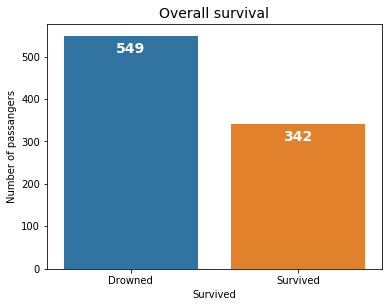

In [29]:
# number of people who survived
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = train_set_cpy )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Overall survival' , fontsize=14)
plt.ylabel('Number of passangers')
# calculate passengers for each category
labels = (train_set_cpy["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-40 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')


In [30]:
train_set_cpy["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

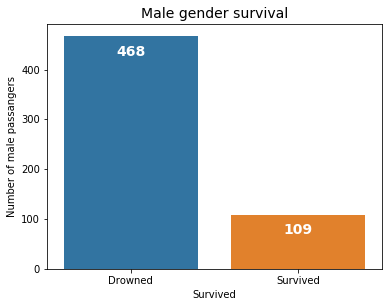

In [31]:
# number of males who survived 
target1 = train_set.loc[(train_set["Sex"] == "male")]
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = target1 )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Male gender survival' , fontsize=14)
plt.ylabel('Number of male passangers')
# calculate passengers for each category
labels = (target1["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-40 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')


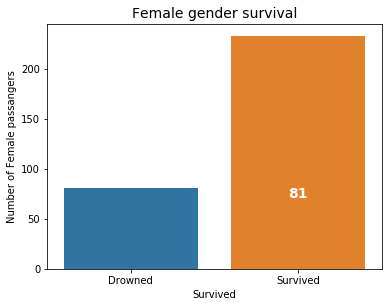

In [32]:
# number of females who survived 
target2 = train_set.loc[(train_set["Sex"] == "female")]
plt.figure(figsize=(6,4.5))
ax = sns.countplot(x = 'Survived' , data = target2 )
plt.xticks(np.arange(2),['Drowned','Survived'])
plt.title('Female gender survival' , fontsize=14)
plt.ylabel('Number of Female passangers')
# calculate passengers for each category
labels = (target2["Survived"].value_counts())
for x1 , x2 in enumerate(labels):
    ax.text(x1 , x2-10 , str(x2) , horizontalalignment = 'center' , size = 14 , color = 'w' , fontweight = 'bold')

Text(0, 0.5, 'Frequency')

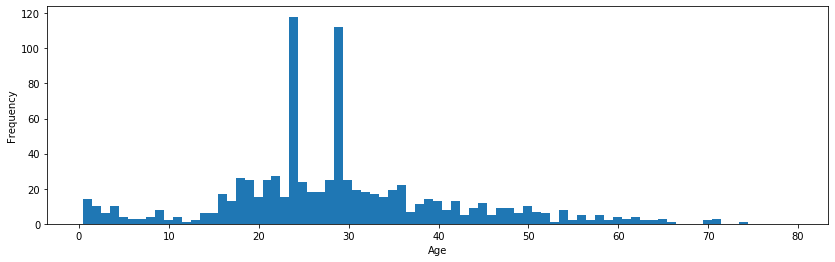

In [33]:
# Age distribuation 
fig , ax = plt.subplots(figsize=(14,4))
ax.hist(x = train_set['Age'], bins = np.arange(train_set['Age'].min() , train_set['Age'].max()) )
ax.yaxis.tick_left()
plt.xlabel('Age')
plt.ylabel('Frequency')

In [34]:
train_set['Age'].describe()

count    891.000000
mean      29.072020
std       13.110421
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

([<matplotlib.axis.YTick at 0x1a2d4a6490>,
 <a list of 2 Text yticklabel objects>)

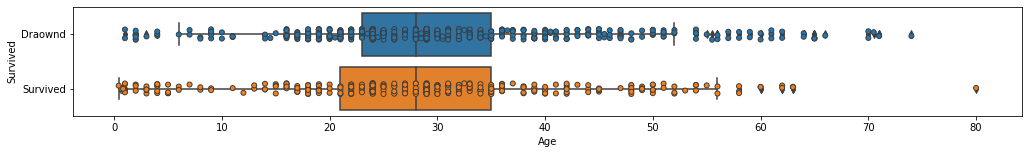

In [35]:
# Surviving by age
plt.subplots(figsize=(17,2))
sns.boxplot(x = 'Age' , y = 'Survived', data = train_set , orient = 'h' )
sns.stripplot(x = 'Age' , y = 'Survived', data = train_set , linewidth = 1, orient = 'h' )
plt.yticks(np.arange(2), ['Draownd','Survived'])


In [36]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
for x in train_set_x :
    print('Survival Correlation by:', x)
    print(train_set_cpy[[x,Target[0]]].groupby(x).mean())
    print('-'*10, '\n')


Survival Correlation by: Pclass
        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
---------- 

Survival Correlation by: Sex
        Survived
Sex             
female  0.742038
male    0.188908
---------- 

Survival Correlation by: Age
       Survived
Age            
0.42        1.0
0.67        1.0
0.75        1.0
0.83        1.0
0.92        1.0
...         ...
70.00       0.0
70.50       0.0
71.00       0.0
74.00       0.0
80.00       1.0

[88 rows x 1 columns]
---------- 

Survival Correlation by: SibSp
       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000
---------- 

Survival Correlation by: Parch
       Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000
---------- 

Survival Correlation by: Embarked
          Survived
Embarked          
C         0.553571
Q         0.389610
S

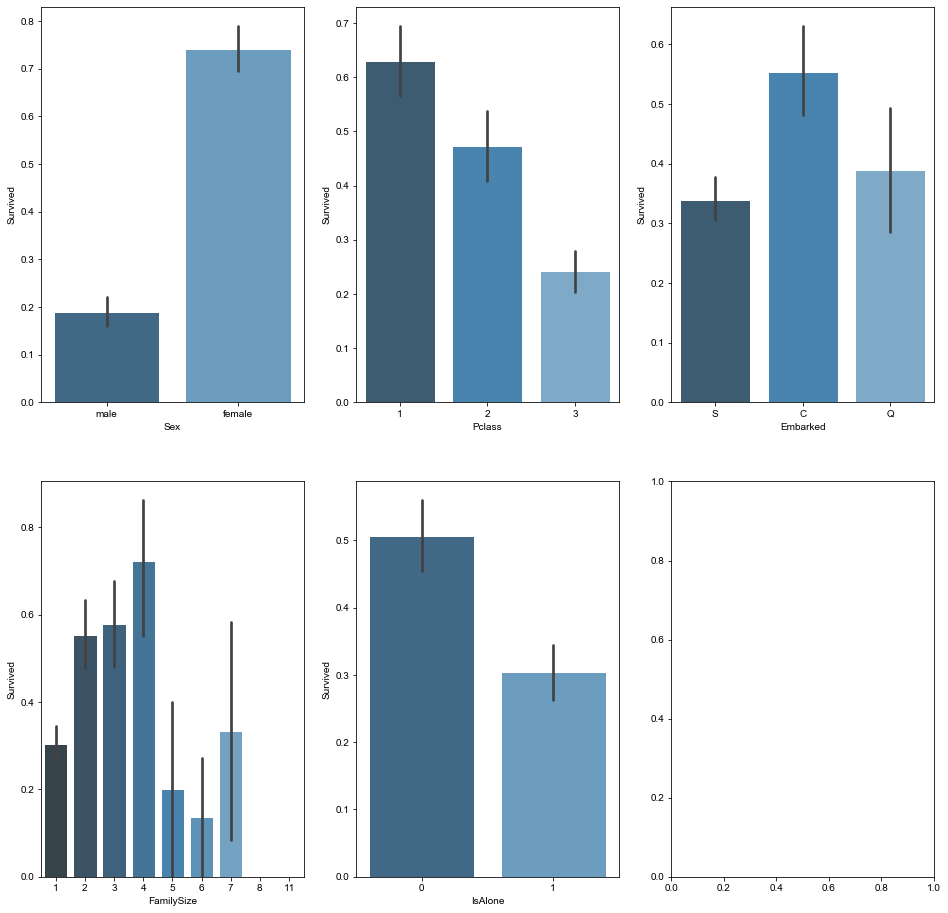

In [37]:
# Seaborn graphics for multi-variables comparison : https://seaborn.pydata.org/api.html
fig , axs = plt.subplots(2,3,figsize=(16,16))
sns.set(style="whitegrid")
sns.barplot(x = 'Sex', y = 'Survived', data = train_set_cpy , ax = axs[0,0] , palette="Blues_d")
sns.barplot(x = 'Pclass', y = 'Survived', data = train_set_cpy , ax = axs[0,1] , palette="Blues_d")
sns.barplot(x = 'Embarked', y = 'Survived', data = train_set_cpy , ax = axs[0,2] , palette="Blues_d")
sns.barplot(x = 'FamilySize', y = 'Survived', data = train_set_cpy , ax = axs[1,0] , palette="Blues_d")
sns.barplot(x = 'IsAlone', y = 'Survived', data = train_set_cpy , ax = axs[1,1] , palette="Blues_d")


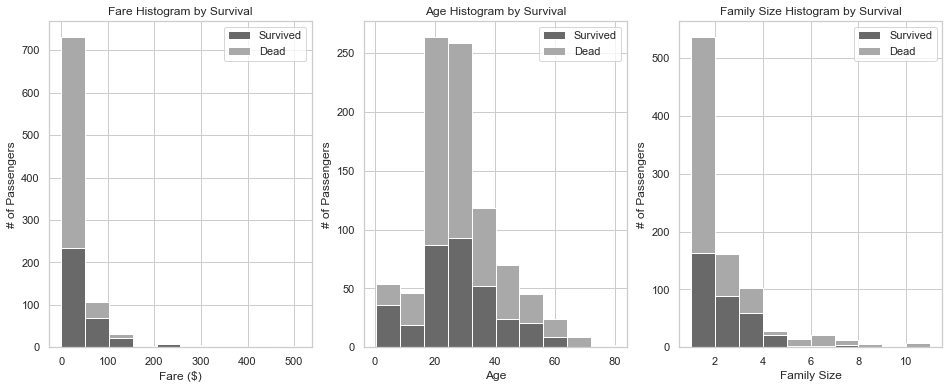

In [38]:
# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html

plt.figure(figsize=(16,6))





plt.subplot(131)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['Fare'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['Fare']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()




plt.subplot(132)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['Age'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['Age']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age')
plt.ylabel('# of Passengers')
plt.legend()




plt.subplot(133)
plt.hist( x = [train_set_cpy[train_set_cpy['Survived'] == 1]['FamilySize'] ,train_set_cpy [train_set_cpy['Survived'] == 0]['FamilySize']] ,
        stacked = True ,
        label = ['Survived','Dead'],
        color = ['dimgrey','darkgrey'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size')
plt.ylabel('# of Passengers')
plt.legend()

Text(0.5, 1.0, 'Sex vs Embarked Survival Comparison')

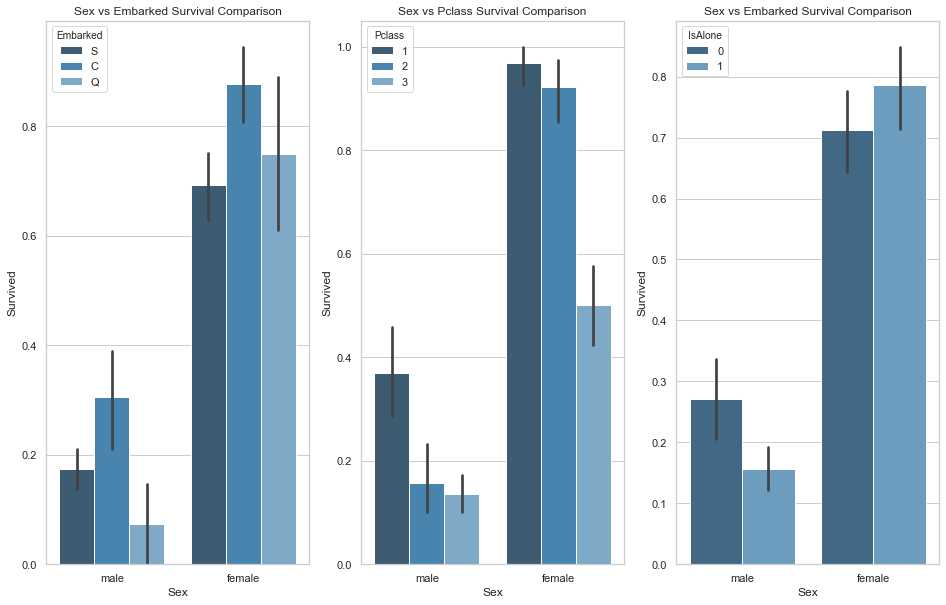

In [39]:
#graph distribution of qualitative data: Sex

# Seaborn graphics for multi-variables comparison : https://seaborn.pydata.org/api.html
fig , axs = plt.subplots(1,3,figsize=(16,10))
sns.set(style="whitegrid")


sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked' , data = train_set_cpy , ax = axs[0] , palette="Blues_d")
axs[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass' , data = train_set_cpy , ax = axs[1] , palette="Blues_d")
axs[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone' , data = train_set_cpy , ax = axs[2] , palette="Blues_d")
axs[2].set_title('Sex vs Embarked Survival Comparison')

/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/yarasaleh/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


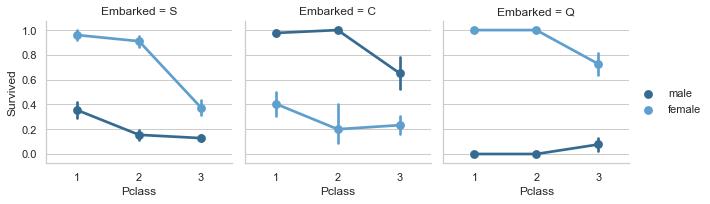

In [40]:
#graph distribution comparing embarked port with sex and survival factor 

#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
#https://seaborn.pydata.org/generated/seaborn.pointplot.html


fig = g = sns.FacetGrid(train_set_cpy, col="Embarked")
fig.map(sns.pointplot , 'Pclass' , 'Survived', 'Sex', ci = 78 , palette="Blues_d")
fig.add_legend()

In [48]:
# Machine Learning Algorithm (MLA) to test best preformance

MLAs = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    
    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability = True),
    svm.NuSVC(probability = True),
    svm.LinearSVC(),
    
    #Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis()
    
    
]

In [ ]:
# loading a pre-trained model
vgg16 = models.vgg16(pretrained=True)

# freeze the parameters so we don't update the weights
for parsm in model.parameters():
    param.requires_grad = False
    
# untrained network
vgg16.classifier = nn.Sequential(nn.Linear(12,6),
                                nn.ReLU(),
                                nn.Linear(6,1),
                                nn.LogSoftmax(dim=1))
certerion = nn.NLLoss()
# Only train the classifier(network) parameters, feature parameters are frozen


## Credits 
- [Titanic EDA tutorial with seaborn](https://www.kaggle.com/demidova/titanic-eda-tutorial-with-seaborn#5.-First-look:-variables,-NAs)
- [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)